# Simple Linear Regression

The goal of this project was to build a linear regression model from the ground up using numpy.

In [6]:
%matplotlib inline

#imports
from numpy import *
import matplotlib.pyplot as plt

#### Import the data
Here, we're using a dataset with two columns containing the amount of hours studied and the test scores students achieved, respectively.

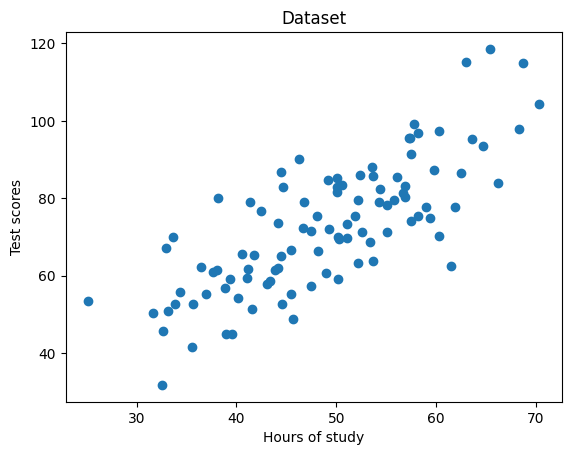

In [8]:
points = genfromtxt('data.csv', delimiter=',')

#Extract columns
x = array(points[:,0])
y = array(points[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

#### Defining the hyperparamters

In [9]:
#hyperparamters
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 10

#### Define cost function

In [10]:
def compute_cost(b, m, points):
    total_cost = 0
    N = float(len(points))
    
    #Compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    #Return average of squared error
    return total_cost/N

#### Define Gradient Descent functions

In [11]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []

    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, array(points), learning_rate)

    return [b, m, cost_graph]

def step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    #Update current m and b
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, m_updated

#### Run gradient_descent_runner() to get optimized parameters b and m

In [12]:
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))

Optimized b: 0.02963934787473239
Optimized m: 1.4774173755483797
Minimized cost: 112.65585181499746


#### Plotting the cost per iterations

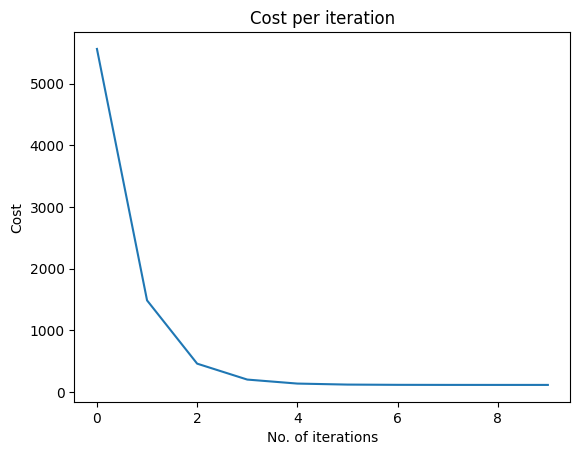

In [13]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

Gradient descent converges to local minimum after 5 iterations

#### Plot line of best fit

In [14]:
class LinearRegressionModel:
    def __init__(self, b, m):
        self.b = b
        self.m = m

    def predict(self, x):
        return self.m * x + self.b

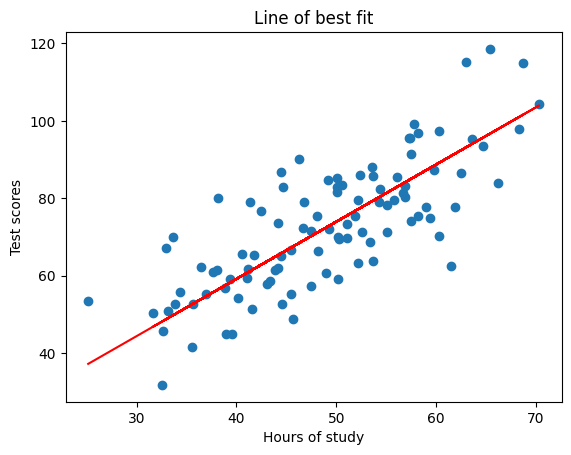

In [15]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
lr = LinearRegressionModel(b, m)
pred = lr.predict(x)
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

# MLflow process

In [16]:
hyperparameters = {
    "learning_rate": learning_rate,
    "initial_b": initial_b,
    "initial_m": initial_m,
    "num_iterations": num_iterations,
}

In [17]:
import mlflow
import mlflow.pyfunc

In [18]:
class LinearRegressionModelWrapper(mlflow.pyfunc.PythonModel):
    def __init__(self, b, m):
        self.model = LinearRegressionModel(b, m)

    def predict(self, context, model_input):
        return self.model.predict(model_input)

/Users/mac/Desktop/work/MLops/mlflow-practise/MLflow-test/venv/lib/python3.12/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


In [19]:
lr = LinearRegressionModelWrapper(b, m)

In [20]:
mlflow.set_tracking_uri("https://dagshub.com/abd.elhakim.arabet/MLflow-test.mlflow")


In [22]:
import os
os.environ["MLFLOW_TRACKING_USERNAME"] = "abd.elhakim.arabet"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "4a9bd5511fa6e2fa8c76682efd04835a3dffe860"  
os.environ["MLFLOW_TRACKING_URI"] = "https://dagshub.com/abd.elhakim.arabet/MLflow-test.mlflow"

In [28]:
mlflow.set_experiment("linear regression demo")

with mlflow.start_run():
    mlflow.log_params(hyperparameters)
    mlflow.log_metrics({
        "minimal_cost": cost_graph[-1]
    })
    # Note: Model logging disabled due to DagsHub compatibility issues
    # mlflow.pyfunc.log_model(
    #     artifact_path="linear_regression_model",
    #     python_model=lr
    # )

🏃 View run serious-wasp-385 at: https://dagshub.com/abd.elhakim.arabet/MLflow-test.mlflow/#/experiments/0/runs/9c992cbe2da8480e9de670284fa57f0c
🧪 View experiment at: https://dagshub.com/abd.elhakim.arabet/MLflow-test.mlflow/#/experiments/0


In [ ]:

result = mlflow.register_model(
    "runs:/380ffeb80d394ec7b627dcef8837b00a/linear_regression_model_2", "linear_regression_study_score"
)

Registered model 'linear_regression_study_score' already exists. Creating a new version of this model...
2025/07/30 13:13:08 WARNING mlflow.tracking._model_registry.fluent: Run with id 380ffeb80d394ec7b627dcef8837b00a has no artifacts at artifact path 'linear_regression_model_2', registering model based on models:/m-7536111c35944b87893fa4a0b98a6822 instead
2025/07/30 13:13:09 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: linear_regression_study_score, version 1
Created version '1' of model 'linear_regression_study_score'.


In [ ]:
model = mlflow.pyfunc.load_model("models:/linear_regression_study_score/1")


In [ ]:
print("Tracking URI:", mlflow.get_tracking_uri())

Tracking URI: http://127.0.0.1:5000


In [ ]:
y = model.predict(x)

In [ ]:
len(y)

100

## set up dagshub

In [ ]:
import dagshub
dagshub.init(repo_owner='abd.elhakim.arabet', repo_name='MLflow-test', mlflow=True)


❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

/Users/mac/Desktop/work/MLops/mlflow-practise/MLflow-test/venv/lib/python3.12/site-packages/rich/live.py:256: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=589cf2ee-d311-4df7-a918-3f0ed2784731&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=72fc46920323a0e37559b0711766d6b1453cb711603b14a595ab76d1ccc8779f




Accessing as abd.elhakim.arabet

Initialized MLflow to track repo "abd.elhakim.arabet/MLflow-test"

Repository abd.elhakim.arabet/MLflow-test initialized!